# Plotting Google Trend Graphs with Matplotlib and Pandas

Documentation of pytrends <https://pypi.org/project/pytrends/> 
* written for Python 3.3+
* Requests, lxml, Pandas


In [27]:
# Installation: google-api-python-client
#!pip install pytrends

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# API connect to Google
from pytrends.request import TrendReq
#create a pytrend object. Request data from Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

In [46]:
#Build the payload and send the request. Extract the data from the response about the top 5 programming languages
kw_list=['c++','java','python','html','R'] # max 5 keywords
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='') # consult documentation for details on the parameters

In [47]:
#get the data for trends over time
data=pytrends.interest_over_time()
data    # gives a large dataframe

,c++,java,python,html,R,isPartial
date,,,,,,
2017-08-13,76,24,17,12,60,False
2017-08-20,76,25,17,13,57,False
2017-08-27,77,25,18,13,57,False
2017-09-03,70,25,18,13,58,False
2017-09-10,82,29,21,14,60,False
...,...,...,...,...,...,...
2022-07-03,90,22,33,14,53,False
2022-07-10,89,24,33,13,49,False
2022-07-17,95,23,34,14,53,False


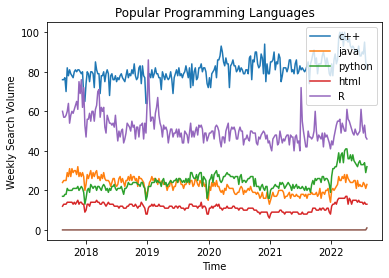

In [48]:
#plot the data
import matplotlib.pyplot as plt
plt.plot(data)

#add a title and labels to the plot
plt.title('Popular Programming Languages')
plt.xlabel('Time')
plt.ylabel('Weekly Search Volume')


#add legend to the plot
plt.legend(kw_list, loc='upper right')
plt.show()
plt.savefig('PopProgLang.jpg')

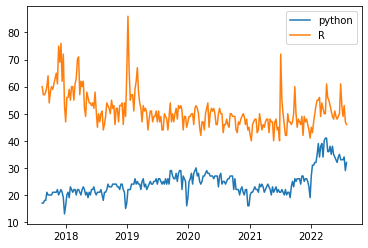

In [55]:
#analyze data related to Python and R
focus= ['python','R']
plt.plot(data[focus])
plt.legend(focus, loc='upper right')

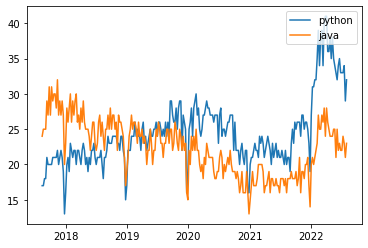

In [57]:
 #analyze data related to Python and R
focus= ['python','java']
plt.plot(data[focus])
plt.legend(focus, loc='upper right')

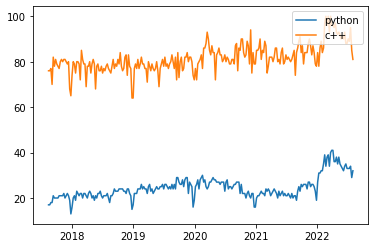

In [59]:
#analyze data related to Python and R
focus= ['python','c++']
plt.plot(data[focus])
plt.legend(focus, loc='upper right')

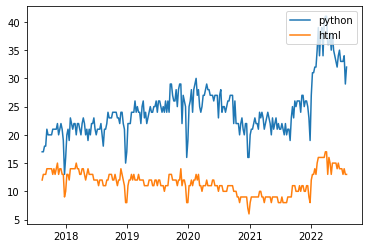

In [60]:
#analyze data related to Python and R
focus= ['python','html']
plt.plot(data[focus])
plt.legend(focus, loc='upper right')

In [70]:
#extract data for country level data about the top 5 programming languages
data2=pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the most searches for python over the last 5 years
data2=data2['python'].nlargest(15)
data2


geoName
China          49
Eritrea        38
Israel         38
St. Helena     31
South Korea    27
Singapore      26
Russia         25
Hong Kong      23
Taiwan         23
Iceland        22
Kyrgyzstan     21
Norway         21
Armenia        20
Estonia        19
Iran           19
Name: python, dtype: int32

In [72]:
type(data2)

pandas.core.series.Series

In [73]:
#convert to a dataframe
data2=data2.to_frame()
data2

,python
geoName,
China,49
Eritrea,38
Israel,38
St. Helena,31
South Korea,27
Singapore,26
Russia,25
Hong Kong,23
Taiwan,23


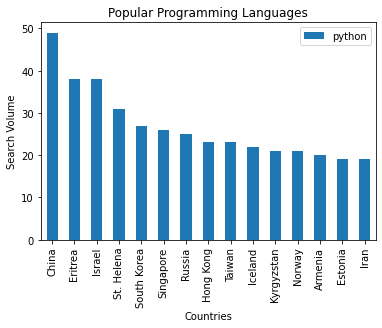

In [75]:
#plot a bar chart with Pandas
data2.plot(kind='bar')

#add a title and labels to the plot
plt.title('Popular Programming Languages')
plt.xlabel('Countries')
plt.ylabel('Search Volume')
plt.show()

In [81]:
#plot a bar chart with multiple keywords
data3=pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3=data3[20:30]
data3


,c++,java,python,html,R
geoName,,,,,
Belgium,49,10,13,6,22
Belize,49,5,6,8,32
Benin,41,26,8,10,15
Bermuda,50,4,8,3,35
Bhutan,40,9,15,10,26
Bolivia,47,14,6,8,25
Bosnia & Herzegovina,48,11,7,10,24
Botswana,45,13,9,6,27
Bouvet Island,0,0,0,0,0


<AxesSubplot:xlabel='geoName'>

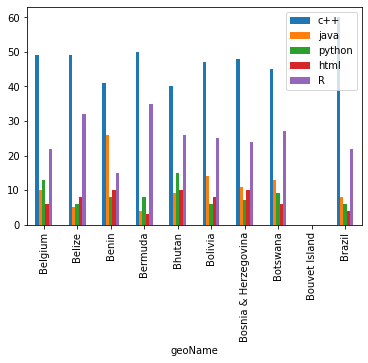

In [82]:
data3.plot(kind='bar')